# cleanup rtsys source data

In [1]:
import glob

# cognac data and tools
import cognac.insitu as insi

---
## load data

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
#campaign = 'lopstech19_leg2.yaml'
campaign = 'cognac20.yaml'

cp = insi.utils.campaign(campaign)

In [3]:
# load source data
label = 'emetteur'
sdata = insi.source.load_source_files(cp[label]['path'], label=label)

Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_10-51-23.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_10-55-56.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_11-29-39.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_11-34-43.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-08-39.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-45-44.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-47-21.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-56-25.txt
Reads /U

In [4]:
# inspect gps data
sdata.gps.d.head()

,lon,lat,velocity
time,,,
2020-11-23 10:51:32,7.268177,43.330579,NaN
2020-11-23 10:51:33,7.268170,43.330578,0.561821
2020-11-23 10:51:34,7.268171,43.330581,0.424697
2020-11-23 10:51:35,7.268168,43.330579,0.355327
2020-11-23 10:51:36,7.268164,43.330576,0.520145


In [5]:
#sdata.gps.d.fillna(0., inplace=True)

In [6]:
sdata.gps.plot_bk(unit=cp['source'], rule='1T')

Loading BokehJS ...

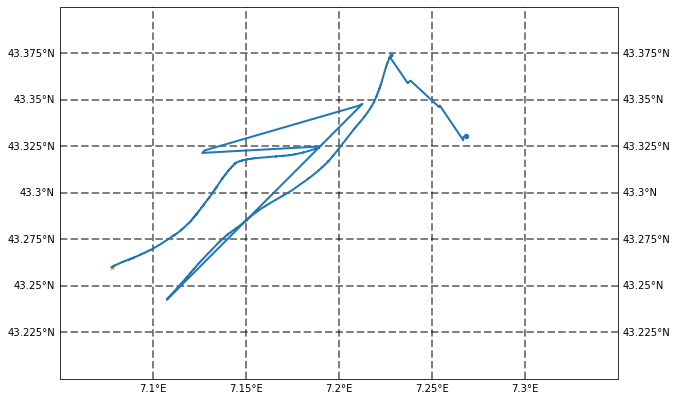

In [7]:
fac = insi.utils.plot_map(cp=cp)
sdata.gps.plot(fac=fac)

---
## clean up data and divide by deployments

In [8]:
# clean gps data with deployment log
source={}
for s in cp['emetteur']:
    print(s)
    source[s.label] = sdata.clean_deployment(s, inplace=False)

--
Deployment label: j1_synchro0
Start:
-
Event label: start
Time: 
2020-11-23 10:56:00
Lon:7.266666666666667 = 7.0deg 15.999999999999996
Lat:43.3295 = 43.0deg 19.77000000000018

End:
-
Event label: end
Time: 
2020-11-23 11:06:30
Lon:7.266666666666667 = 7.0deg 15.999999999999996
Lat:43.32833333333333 = 43.0deg 19.69999999999999


--
Deployment label: j1_synchro1
Start:
-
Event label: start
Time: 
2020-11-23 11:34:50
Lon:7.254166666666666 = 7.0deg 15.249999999999986
Lat:43.347 = 43.0deg 20.82000000000008

End:
-
Event label: end
Time: 
2020-11-23 11:45:20
Lon:7.253833333333334 = 7.0deg 15.230000000000015
Lat:43.346 = 43.0deg 20.759999999999792


--
Deployment label: j1_synchro2
Start:
-
Event label: start
Time: 
2020-11-23 12:08:47
Lon:7.2385 = 7.0deg 14.31000000000001
Lat:43.36033333333334 = 43.0deg 21.620000000000203

End:
-
Event label: end
Time: 
2020-11-23 12:19:12
Lon:7.237 = 7.0deg 14.220000000000006
Lat:43.359 = 43.0deg 21.540000000000106


--
Deployment label: j1
Start:
-
Event

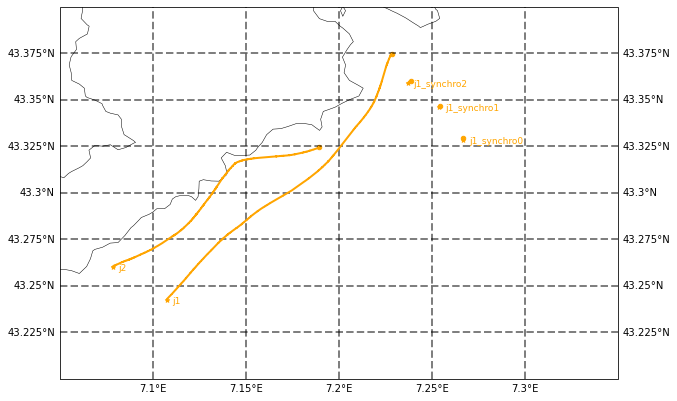

In [9]:
# plot overview map
fac = insi.utils.plot_map(cp=cp, ll_lim=[7.05, 7.35, 43.2, 43.4])
insi.utils.plot_bathy(fac)
for label, s in source.items():
    if s.gps:
        s.gps.plot(fac=fac, label=label, color=cp['emetteur']['color'], offset=.01)

---
## store

In [10]:
for label, lsource in source.items():
    #lsource.to_pickle(cp.pathp+'source_log_'+label+'.p')
    lsource.to_nc(cp.pathp+'emetteur_log_'+label+'.nc')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_synchro0_gps.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_synchro0_emission.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_synchro1_gps.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_synchro1_emission.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_synchro2_gps.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_synchro2_emission.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_gps.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_log_j1_emission.nc
Data store to /Users/aponte/Current_projects/c

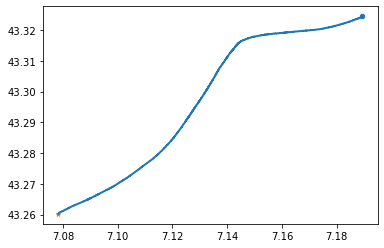

In [12]:
# reload
_source = {}
for label, lsource in source.items():
    _source[label] = insi.source.source_rtsys(file=cp.pathp+'emetteur_log_'+label+'.nc')
_source[label].gps.plot()